# Atividade #3 -- Aprendizado de Neurônio Perceptron

A atividade consiste no aprendizado de um neurônio perceptron para a solução do problema linearmente separável da porta lógica NAND.

- Jean Phelipe de Oliveira Lima - 1615080096
- Rodrigo Gomes de Souza - 1715310022

### Bibliotecas

In [1]:
import numpy as np
from random import uniform
from matplotlib import pyplot as plt

### Conjunto de Treinamento

Entradas e Saídas relativas às combinações de entrada da porta lógica NAND


X -> Conjunto das entradas, onde cada entrada fora acrescida de bias de valor -1.

Y -> Conjunto das saidas relativas a cada entrada.

In [2]:
X = [[-1,0,0],[-1,0,1],[-1,1,0],[-1,1,1]] 
for i in range(len(X)):
    X[i] = np.asarray(X[i]) 

Y = [1,1,1,0]

### Vetor de Pesos

Vetor W contendo os pesos de cada entrada. Inicialmente W é gerada aleatoriamente no intervalo [-0.5, 0.5]

In [3]:
W=[]
for i in range(3):
    W.append(uniform(-0.5,0.5))
W = np.asarray(W)
print('Pesos Iniciais = ', W)

Pesos Iniciais =  [-0.18850391  0.23372512 -0.02914894]


### Função de Ativação

Função degrau com limiar igual a zero.

      f(u = ∑xi·wi) = { 1, u ≥ 0.   
                        0, cc.

In [4]:
def ativacao(entrada, pesos):
    u = 0
    for i in range(3):
        u += entrada[i]*pesos[i]
    if (u>=0):
        return 1
    else:
        return 0

### Ajuste de Pesos

    Regra Delta:
    
    w(n+1) = w(n) + η·(yic − yio)·xi ;  yic: Saída correta para a entrada xi
                                        yio: Saída obtida para a entrada xi
                                        η: Taxa de aprendizado 

In [5]:
def ajuste(entradas, pesos, taxa, saida_correta, saida_obtida):
    for i in range(len(saida_correta)):
        erro = saida_correta[i]-saida_obtida[i]
        pesos = (pesos + (taxa*erro*entradas[i]))
    return pesos

### Treinamento do Perceptron

In [6]:
def treinamento_perceptron(W, X, Y, taxa_aprendizado):
    saida_obtida = []
    peso_por_epoca = W
    epoca = 1
    num_ajustes = 0

    while(saida_obtida!=Y):
        print('Época ', epoca,':')
        print('\tVetor de Pesos:', W)
        saida_obtida=[]
        for i in range(len(X)):
            ativacao(X[i], W)
            saida_obtida.append(ativacao(X[i], W))

        corretos = 0
        errados = 0
        lista_erros = np.asarray(Y) - np.asarray(saida_obtida)
        for i in lista_erros:
            if i==0:
                corretos += 1
            else:
                errados +=1
        num_ajustes+=errados
        print('\tExemplos corretos:', corretos)
        print('\tExemplos errados:', errados)
        if saida_obtida != Y:
            W = ajuste(X, W, taxa_aprendizado, Y, saida_obtida)
            epoca+=1
    
    return W, epoca, num_ajustes

In [7]:
W, epocas, num_ajustes = treinamento_perceptron(W,X,Y,taxa_aprendizado=0.2)

print('\nTotal de épocas:', epocas)
print('Total de ajustes:', num_ajustes)

Época  1 :
	Vetor de Pesos: [-0.18850391  0.23372512 -0.02914894]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  2 :
	Vetor de Pesos: [ 0.01149609  0.03372512 -0.22914894]
	Exemplos corretos: 2
	Exemplos errados: 2
Época  3 :
	Vetor de Pesos: [-0.38850391  0.03372512 -0.02914894]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  4 :
	Vetor de Pesos: [-0.18850391 -0.16627488 -0.22914894]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  5 :
	Vetor de Pesos: [-0.38850391 -0.16627488 -0.02914894]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  6 :
	Vetor de Pesos: [-0.18850391 -0.36627488 -0.22914894]
	Exemplos corretos: 2
	Exemplos errados: 2
Época  7 :
	Vetor de Pesos: [-0.58850391 -0.16627488 -0.02914894]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  8 :
	Vetor de Pesos: [-0.38850391 -0.36627488 -0.22914894]
	Exemplos corretos: 4
	Exemplos errados: 0

Total de épocas: 8
Total de ajustes: 9


### Fronteira de Decisao

        y = W[0]/W[2] − (W[1]/W[2]) ∗ x

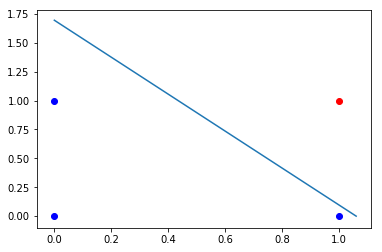

In [8]:
plt.scatter(0,0, color='blue')
plt.scatter(0,1, color='blue')
plt.scatter(1,0, color='blue')
plt.scatter(1,1, color='red')
plt.plot([0, ((W[0]/W[2])/(W[1]/W[2]))], [W[0]/W[2], 0])

plt.show()

## Outras Funções de Ativação

### Degrau (com θ = 0.5)

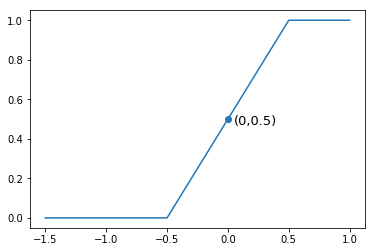

In [9]:
t = np.arange(-1.5, 1.5, 0.5)
s = np.heaviside(t,0.5)

plt.plot(t,s)
plt.scatter(0,0.5)
plt.text(0.05, 0.47, '(0,0.5)', fontsize=13)
plt.show()

### Sigmoidal, com 3 valores distintos de suavidade e centro da curva no valor 0

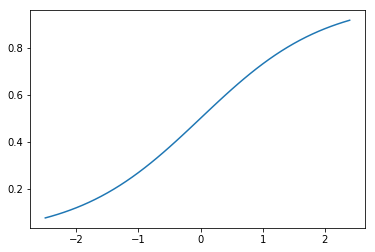

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

t1 = np.arange(-2.5, 2.5, 0.1)
s1 = []
for i in t1:
    s1.append(sigmoid(i))
    
plt.plot(t1,s1)

### Tangente Hiperbólica

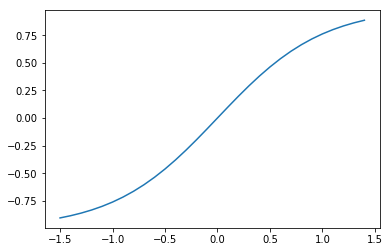

In [11]:
t2 = np.arange(-1.5, 1.5, 0.1)
s2 = 
plt.plot(t2,np.tanh(t2))

### ReLU

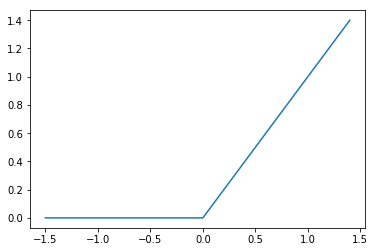

In [12]:
def relu(x):
    return max([0, x])

t3 = np.arange(-1.5, 1.5, 0.1)
s3 = []
for i in t4:
    s3.append(relu(i))
    
plt.plot(t3,s3)